# Creating a Mosaic in Python

From this tutorial (https://developers.planet.com/planetschool/creating-a-mosaic-in-python/).

## Step 1: Install GDAL & QGIS
See details at https://developers.planet.com/planetschool/gdal-qgis-installation-setup/

## Step 2: Check Image Compatibility

Retrieve images

In [ ]:
import os
import glob

In [ ]:
img_folder = './data'
item_type = "PSOrthoTile"
asset_type = "visual"
path = os.path.join(img_folder, item_type, asset_type)
path

In [ ]:
folders = glob.glob(path + '/**')
folders

In [ ]:
files = glob.glob(folders[0] + '/*')

Ensure that images have the same coordinate systems and the same number of bands. Use `gdalinfo` to get image info.

In [5]:
!gdalinfo {files[0]} | grep -A 22 "Coordinate System is: *"
!gdalinfo {files[1]} | grep -A 22 "Coordinate System is: *"

Coordinate System is:
PROJCS["WGS 84 / UTM zone 47N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",99],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32647"]]
Coordinate System is:
PROJCS["WGS 84 / UTM zone 47N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AU

In [6]:
!gdalinfo {files[0]} | grep "Band"
!gdalinfo {files[1]} | grep "Band"

Band 1 Block=2137x1 Type=Byte, ColorInterp=Red
Band 2 Block=2137x1 Type=Byte, ColorInterp=Green
Band 3 Block=2137x1 Type=Byte, ColorInterp=Blue
Band 4 Block=2137x1 Type=Byte, ColorInterp=Alpha
Band 1 Block=512x512 Type=Byte, ColorInterp=Red
Band 2 Block=512x512 Type=Byte, ColorInterp=Green
Band 3 Block=512x512 Type=Byte, ColorInterp=Blue
Band 4 Block=512x512 Type=Byte, ColorInterp=Alpha


In [7]:
files = glob.glob(folders[1] + '/*')

In [8]:
!gdalinfo {files[0]} | grep -A 22 "Coordinate System is: *"
!gdalinfo {files[1]} | grep -A 22 "Coordinate System is: *"

Coordinate System is:
PROJCS["WGS 84 / UTM zone 47N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",99],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32647"]]
Coordinate System is:
PROJCS["WGS 84 / UTM zone 47N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AU

In [9]:
!gdalinfo {files[0]} | grep 'Band'

Band 1 Block=512x512 Type=Byte, ColorInterp=Red
Band 2 Block=512x512 Type=Byte, ColorInterp=Green
Band 3 Block=512x512 Type=Byte, ColorInterp=Blue
Band 4 Block=512x512 Type=Byte, ColorInterp=Alpha


## Step 3: Stitch Images

Use `gdal_merge.py`, a utility function to stitch images together. 

In [10]:
fld = folders[0]
files = glob.glob(fld + '/*')
merge_dest = os.path.join(fld, 'merged.tif')

In [11]:
!gdal_merge.py {' '.join(files)} -o $merge_dest

ERROR 4: `./data/PSOrthoTile/visual/2019-09-30/merged.png.aux.xml' not recognized as a supported file format.
ERROR 4: `./data/PSOrthoTile/visual/2019-09-30/merged-cropped.png.aux.xml' not recognized as a supported file format.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [12]:
!gdalinfo $merge_dest

Driver: GTiff/GeoTIFF
Files: ./data/PSOrthoTile/visual/2019-09-30/merged.tif
Size is 23360, 15680
Coordinate System is:
PROJCS["WGS 84 / UTM zone 47N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",99],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32647"]]
Origin = (619500.000000000000000,1584500.000000000000000)
Pixel Size = (3.125000000000000,-3.125000000000000)
Met

In [13]:
merge_png = os.path.join(fld, 'merged.png')

The merged raster is a large GeoTiff file. Resize it down and convert to PNG so we can view it in the notebook. Use `gdal_translate`, another GDAL utility, to convert it to a PNG and set the output image to a percentage of the original.

In [14]:
!gdal_translate -of "PNG" -outsize 10% 0% $merge_dest $merge_png

Input file size is 23360, 15680
0...10...20...30...40...50...60...70...80...90...100 - done.


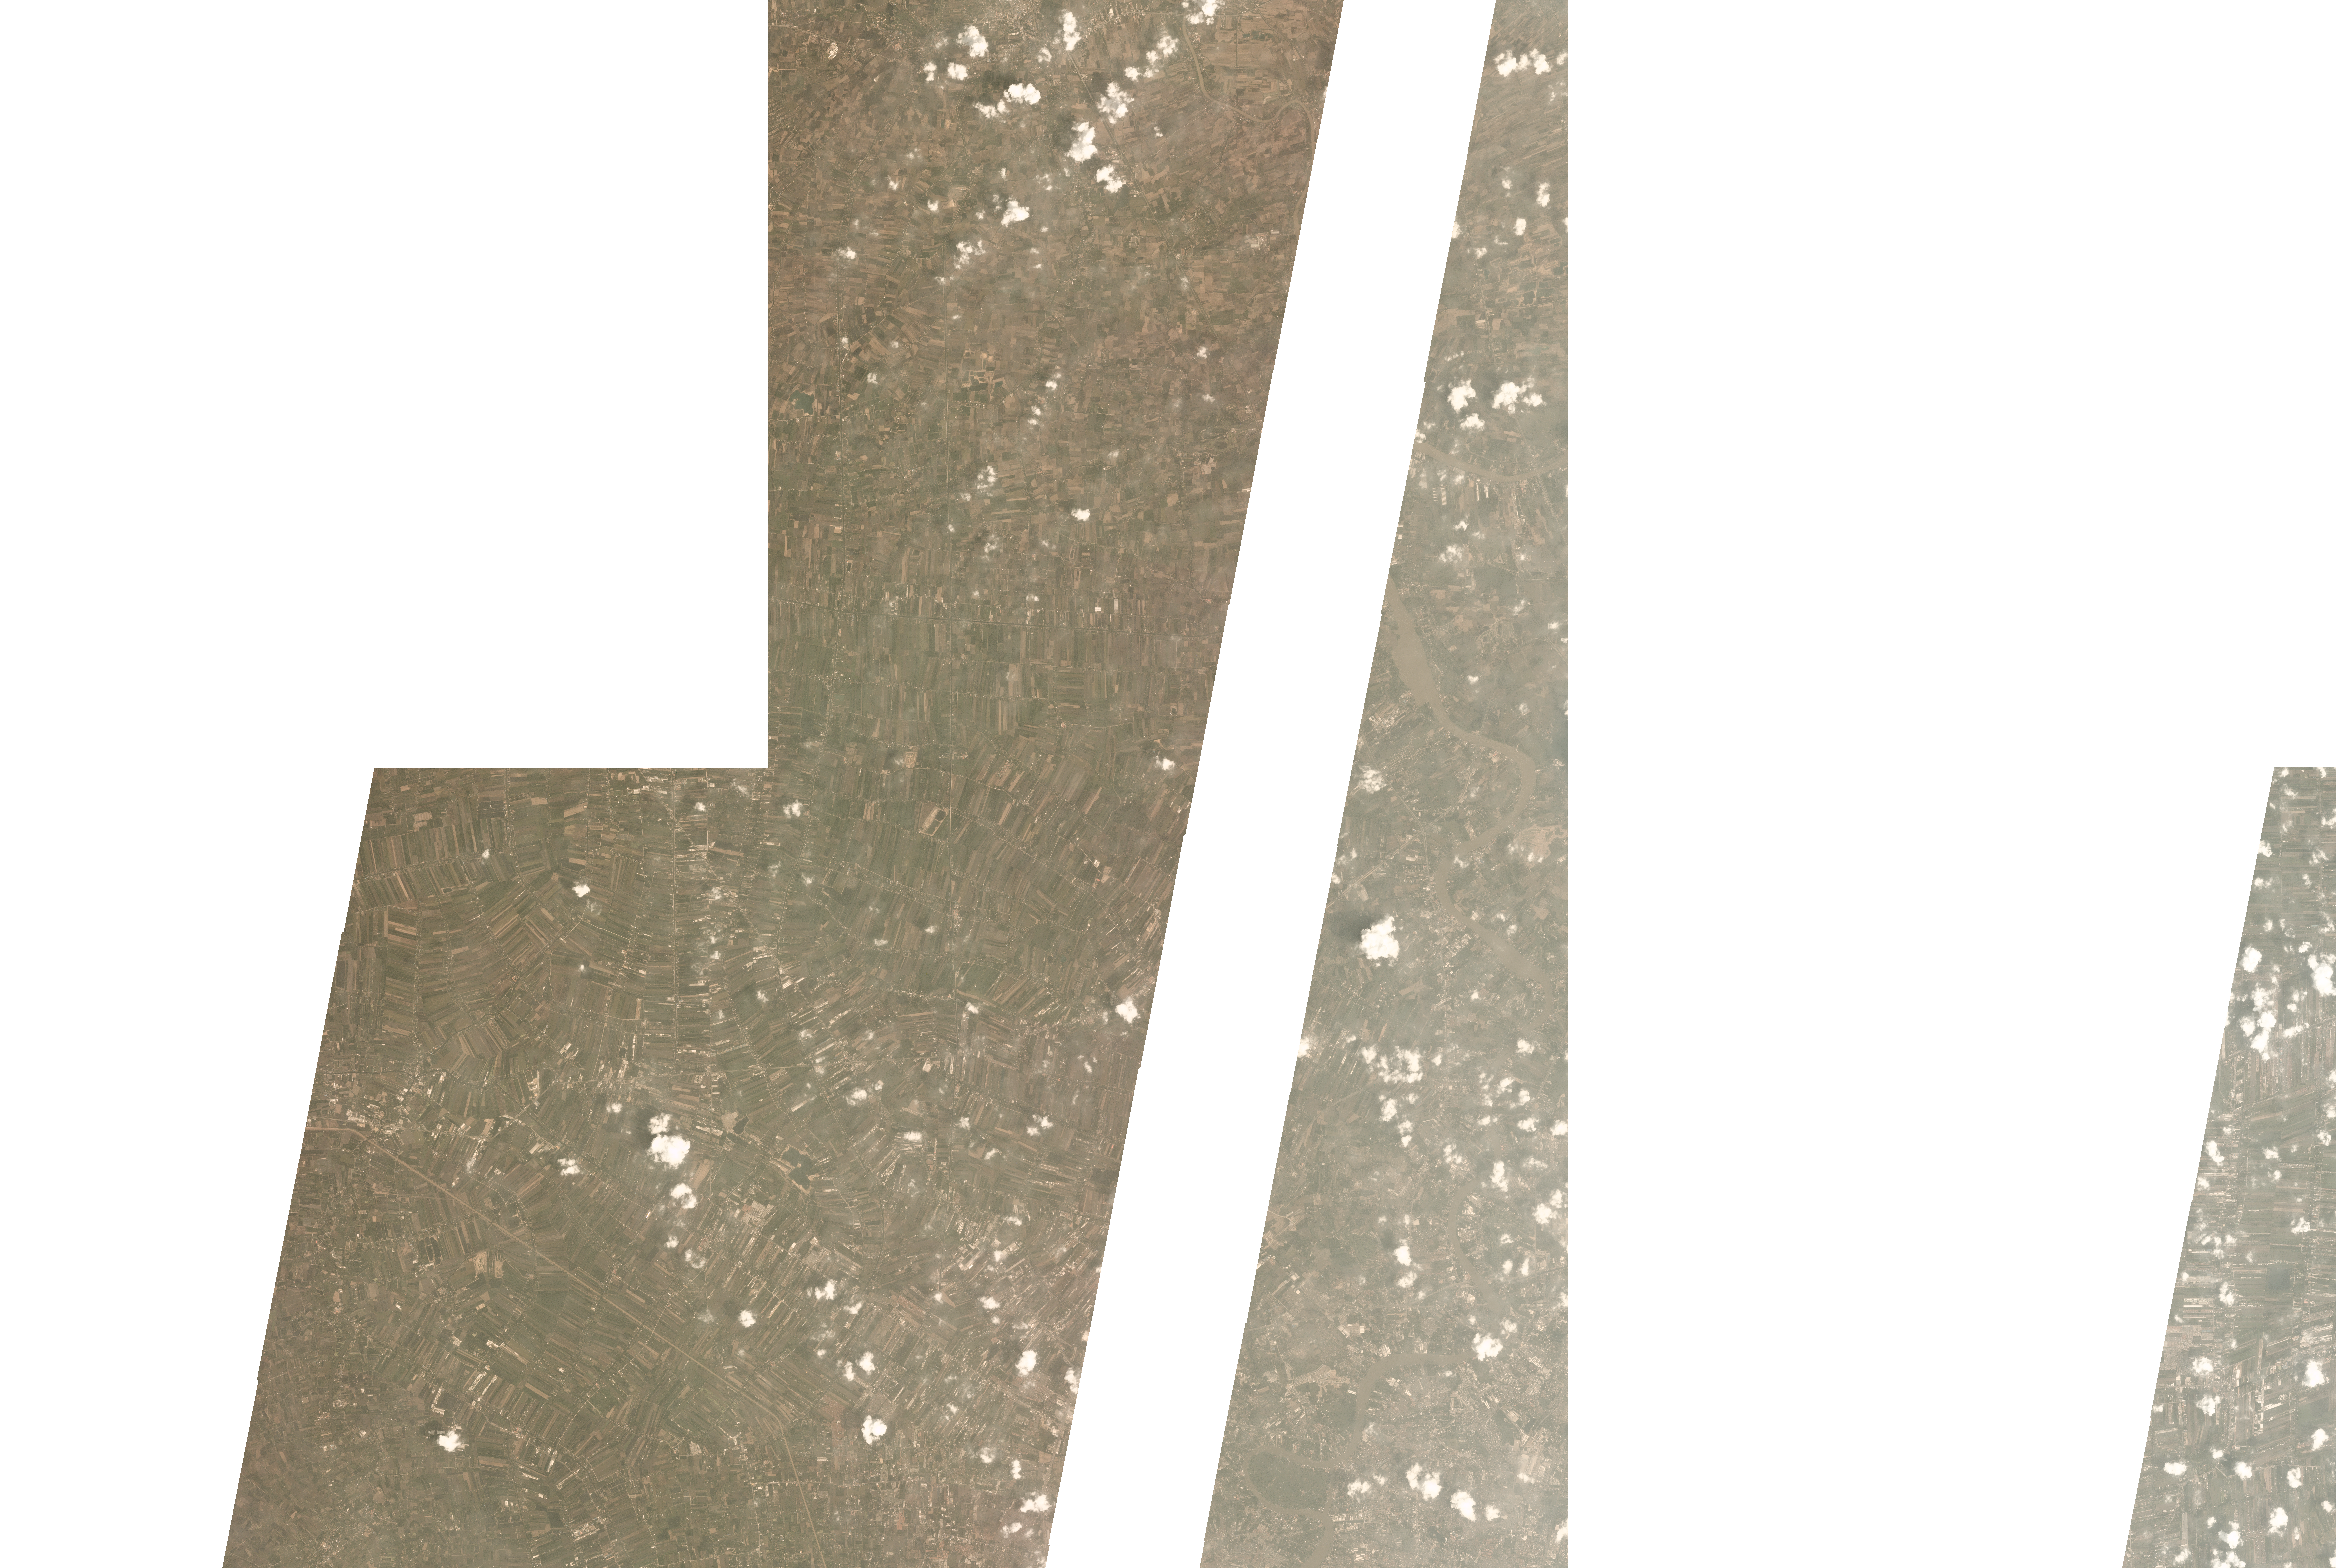

In [15]:
from IPython.display import Image
Image(filename=merge_png)

## Step 4: Clip to AOI

First create AOI in GeoJSON file. Use GeoPandas for convenience.

In [16]:
from pathum_filter import adm1_pathum_df
aoi_geojson = 'pathumthani.geojson'
if not os.path.exists(aoi_geojson):
    adm1_pathum_df.to_file(aoi_geojson, driver="GeoJSON")
aoi_geojson

'pathumthani.geojson'

Use `gdapwarp` to clip the raster to our area of interest (defined by a geojson file).

In [17]:
crop_image = os.path.join(fld, 'merged-cropped.tif')

In [18]:
!gdalwarp -of GTiff -cutline $aoi_geojson -crop_to_cutline $merge_dest $crop_image

ERROR 1: Output dataset ./data/PSOrthoTile/visual/2019-09-30/merged-cropped.tif exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.



Again, we'll use `gdal_translate` to convert the GeoTiff to a smaller PNG so that it's easier to view the cropped image.

In [19]:
crop_png = os.path.join(fld, 'merged-cropped.png')

In [20]:
!gdal_translate -of "PNG" -outsize 10% 0% $crop_image $crop_png

Input file size is 21373, 12789
0...10...20...30...40...50...60...70...80...90...100 - done.


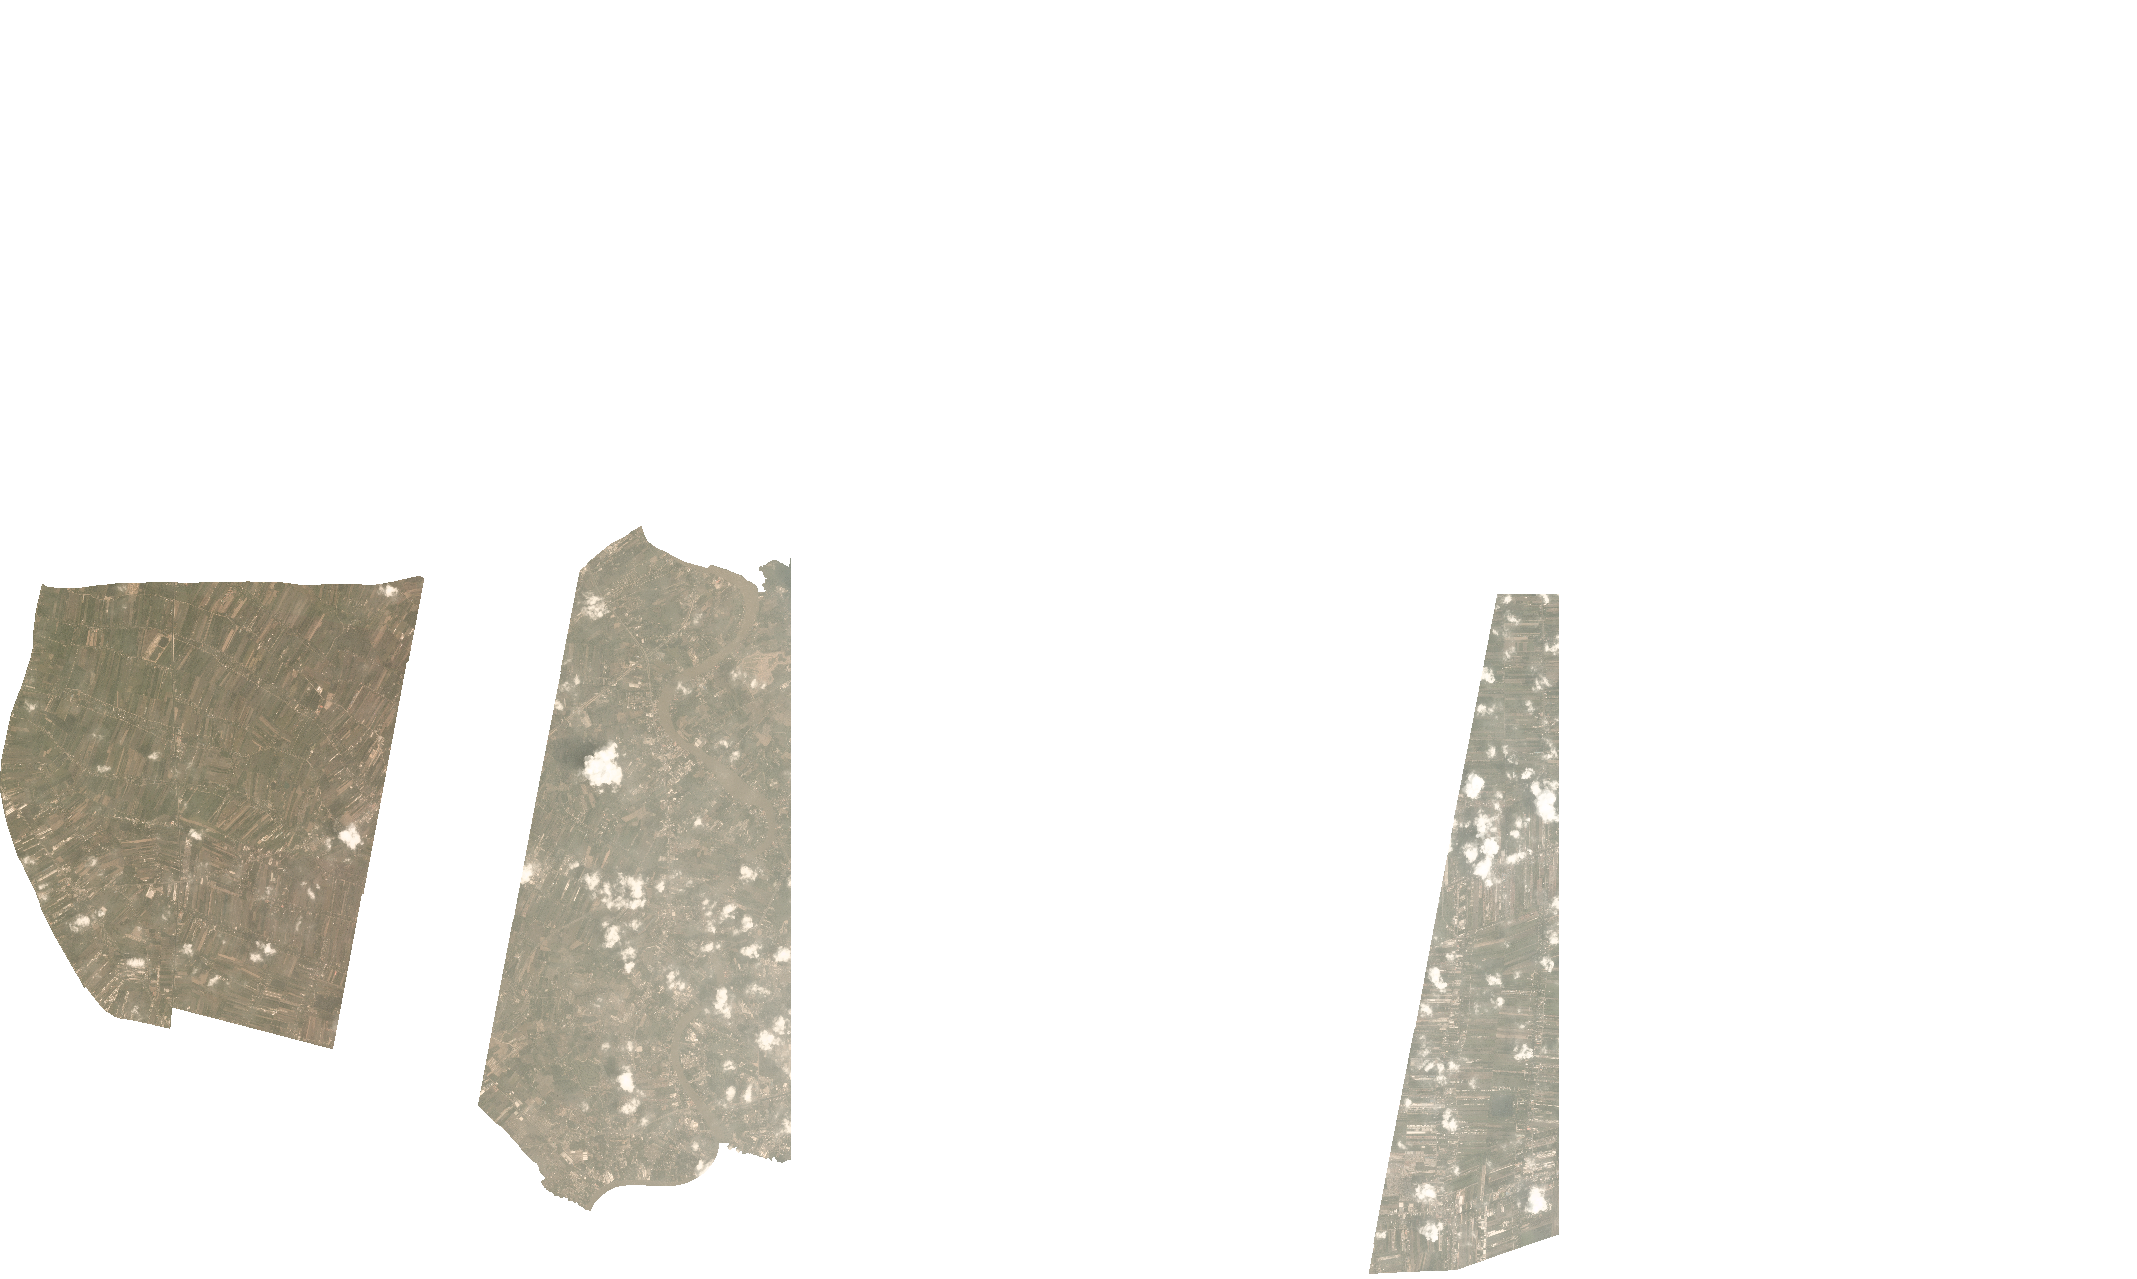

In [21]:
Image(filename=crop_png)